In [ ]:
# !pip install langchain_groq


   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   -------------------- ------------------- 1/2 [langchain_groq]

In [11]:
from langchain_groq import ChatGroq
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START,END
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from IPython.display import Image, display

In [ ]:
groq_api_key = 'YOUR_groq_api_key'
llm = ChatGroq(groq_api_key = groq_api_key, model_name = "llama-3.3-70b-versatile")

In [19]:
class State(TypedDict):
    add_messages: Annotated[list, add_messages]
    sentiment: str
    
def preprocess(state: State) -> State:
    cleaned = state["messages"][-1].content.strip()
    state["messages"][-1].content = cleaned
    return state

def analyze_sentiment(state: State) -> State:
    msg = state["messages"][-1].content
    state["sentiment"] = "positive" if "good" in msg else "neutral"
    return state

# def chatbot(state: State) -> State:
#     return {"messages": llm.invoke(state['messages'])}

def chatbot(state: State) -> State:
    ai_msg = llm.invoke(state["messages"])
    return {"messages": [ai_msg]}


def logger(state: State) -> State:
    print(f"LOG: {state['messages'][-1].content}, Sentiment: {state.get('sentiment')}")
    return state

In [20]:
# Build the graph
builder = StateGraph(State)
builder.add_node("preprocess", preprocess)
builder.add_node("analyze_sentiment", analyze_sentiment)  # renamed
builder.add_node("chatbot", chatbot)
builder.add_node("logger", logger)

In [21]:
# Define flow
builder.add_edge(START, "preprocess")
builder.add_edge("preprocess", "analyze_sentiment")  # renamed
builder.add_edge("analyze_sentiment", "chatbot")     # renamed
builder.add_edge("chatbot", "logger")
builder.add_edge("logger", END)

In [22]:
graph = builder.compile()

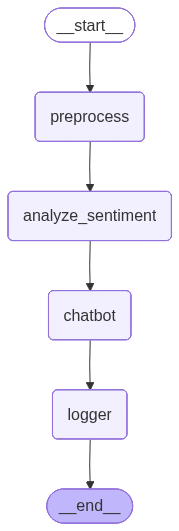

In [23]:
# Draw the graph
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [ ]:
# Invoke the graph
input_message = "This is fruit."
final_state = graph.invoke({
    "messages": [("user", input_message)]
})

# Print the final state
print("Final State:", final_state)
print("Chatbot's response:", final_state["messages"][-1].content)
print("Detected Sentiment:", final_state["sentiment"])

input_message_2 = "This is a neutral message."
final_state_2 = graph.invoke({
    "messages": [("user", input_message_2)]
})
print("Final State 2:", final_state_2)
print("Chatbot's response 2:", final_state_2["messages"][-1].content)
print("Detected Sentiment 2:", final_state_2["sentiment"])

KeyError: 'messages'